In [209]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import numpy as np

%matplotlib inline

from sklearn.datasets import fetch_lfw_people
import logging

from sklearn.decomposition import PCA

In [210]:
# Loading images
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
lfw_people.data.shape

2017-04-01 13:17:18,841 Loading LFW people faces from /Users/Krishn/scikit_learn_data/lfw_home


(1140, 1850)

(-0.5, 36.5, 49.5, -0.5)

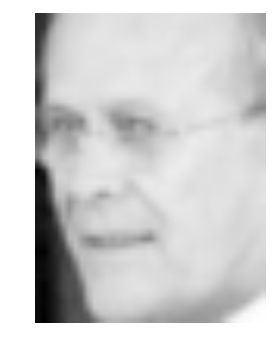

In [211]:
# Example image
plt.imshow(lfw_people.images[9], cmap='Greys_r')
plt.axis('off')

In [212]:
lfw_people.data[0].shape

(1850,)

In [213]:
# # Using sklearn
# n_components = 50
# X = lfw_people.data
# pca = PCA(n_components=n_components, svd_solver='randomized').fit(X)

# for i, component in enumerate(pca.components_):
#     plt.subplot(5, 10, i+1)
#     plt.imshow(component.reshape(50, 37), cmap='Greys_r')
#     plt.axis('off')

In [214]:
lfw_people.data[0].shape

(1850,)

In [215]:
data = lfw_people.data
data_sub = np.array([img - np.mean(img, axis=0) for img in data])
data_sub.shape

(1140, 1850)

In [216]:
cov_mat = np.cov(data_sub.T)
cov_mat.shape

(1850, 1850)

In [217]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)

Eigenvectors 
[[ 0.02116722+0.j          0.02597513+0.j          0.02769032+0.j         ...,
  -0.00229517-0.00046353j -0.00026788+0.00042331j -0.00026788-0.00042331j]
 [ 0.01989051+0.j          0.02431640+0.j          0.03058850+0.j         ...,
  -0.00081193+0.00019443j -0.00047274+0.00024665j -0.00047274-0.00024665j]
 [ 0.02160340+0.j          0.02289568+0.j          0.03357032+0.j         ...,
  -0.00120276-0.0005195j  -0.00089193+0.00093871j -0.00089193-0.00093871j]
 ..., 
 [-0.04393671+0.j          0.04890794+0.j          0.06470041+0.j         ...,
   0.00222936-0.00063981j  0.00019391+0.00044507j  0.00019391-0.00044507j]
 [-0.04116756+0.j          0.04317765+0.j          0.06339867+0.j         ...,
  -0.00281101+0.00463746j -0.01348942-0.00359049j -0.01348942+0.00359049j]
 [-0.03903649+0.j          0.03887182+0.j          0.05336328+0.j         ...,
   0.00660391+0.00399351j -0.00145109+0.00139324j -0.00145109-0.00139324j]]

Eigenvalues 
[  4.05204640e+05 +0.00000000e+00j   2.0

In [218]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
             for i in range(len(eig_vals))]

# Sort eigenpairs
eig_pairs.sort(key=lambda x: x[0], reverse=True)

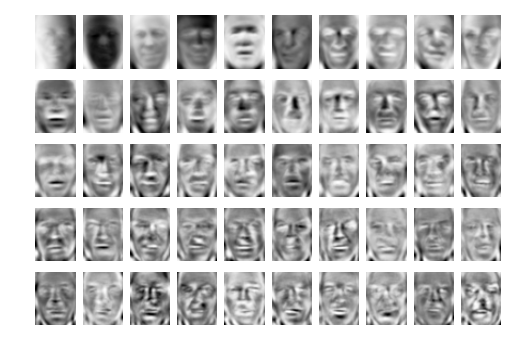

In [219]:
# Plot top 50 eigenvectors to create eigenfaces
num_components = 50
pca_components = eig_pairs[:num_components]

for i, component in enumerate(pca_components):
    e_vec = component[1].real
    plt.subplot(5, 10, i+1)
    plt.imshow(e_vec.reshape(50, 37), cmap='Greys_r')
    plt.axis('off')

(-0.5, 36.5, 49.5, -0.5)

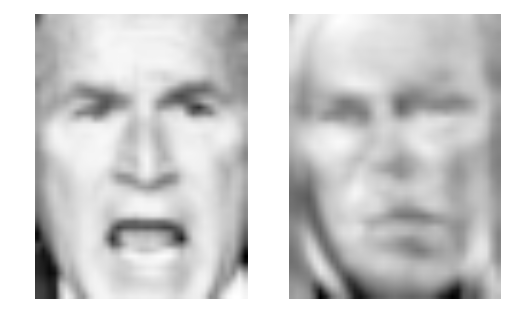

In [220]:
# Reconstruction
ii = 100

img = lfw_people.data[ii]

mean = np.mean(data, axis=0).reshape(50, 37)
rf = np.zeros((50, 37)) + mean

for i,c in enumerate(pca_components):
  rf += (img*c[1].real).reshape(50, 37)

plt.subplot(1, 2, 1)
plt.imshow(lfw_people.images[ii], cmap='Greys_r')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rf, cmap='Greys_r')
plt.axis('off')